In [98]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

# Upload and Preprocess Data

In [99]:
df1 = pd.read_csv('crunchbase_aerospace.csv')
df2 = pd.read_csv('crunchbase_ai.csv')
df3 = pd.read_csv('crunchbase_biotech.csv')
df4 = pd.read_csv('crunchbase_energy.csv')
df5 = pd.read_csv('crunchbase_neurotech.csv')

df1

,Organization Name,Organization Name URL,Operating Status,Company Type,IPO Status,Estimated Revenue Range,Number of Employees,Headquarters Location,Last Funding Type,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Full Description,Industries,Description,Founded Date,Founded Date Precision,Website
0,SpaceX,https://www.crunchbase.com/organization/space-...,Active,For Profit,Private,$1B to $10B,10001+,"Hawthorne, California, United States",Venture - Series Unknown,9.510344e+09,USD,9.510344e+09,Space Exploration Technologies is a space-tran...,"Aerospace, Manufacturing, Space Travel, Transp...",SpaceX is an aviation and aerospace company fo...,2002-05-06,day,https://www.spacex.com
1,Overair,https://www.crunchbase.com/organization/overair,Active,For Profit,Private,NaN,101-250,"Santa Ana, California, United States",Series B,1.700000e+08,USD,1.700000e+08,"Overair designs, develops, and manufactures el...","Aerospace, Air Transportation, Electric Vehicl...","Overair designs, develops, and manufactures el...",2019-01-01,year,https://overair.com
2,Blue Origin,https://www.crunchbase.com/organization/blue-o...,Active,For Profit,Private,$100M to $500M,1001-5000,"Kent, Washington, United States",Grant,1.673500e+08,USD,1.673500e+08,Blue Origin is an aerospace company that focus...,"Aerospace, Manufacturing, National Security, R...",Blue Origin is an aerospace company that focus...,2000-09-08,day,http://www.blueorigin.com
3,DJI,https://www.crunchbase.com/organization/dji,Active,For Profit,Private,$10M to $50M,10001+,"Shenzhen, Guangdong, China",Private Equity,1.050000e+08,USD,1.050000e+08,DJI develops and manufactures innovative drone...,"Aerospace, Consumer Electronics, Drones, Manuf...",DJI develops and manufactures innovative drone...,2006-11-06,day,http://www.dji.com/
4,Sierra Space,https://www.crunchbase.com/organization/sierra...,Active,For Profit,Private,NaN,1001-5000,"Louisville, Colorado, United States",Series A,1.400000e+09,USD,1.400000e+09,Sierra Space products and programs are working...,"Aerospace, Space Travel, Transportation",Sierra Space is a commercial space company wor...,2021-01-01,year,https://sierraspace.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Jetoptera,https://www.crunchbase.com/organization/jetoptera,Active,For Profit,Private,$1M to $10M,1-10,"Edmonds, Washington, United States",NaN,NaN,NaN,NaN,Jetoptera is an aviation startup developing po...,"Aerospace, Manufacturing",Jetoptera is an aviation startup developing po...,2015-01-01,year,http://www.jetoptera.com
996,DRG,https://www.crunchbase.com/organization/drg-adb1,Active,For Profit,Private,$50M to $100M,501-1000,"Oklahoma City, Oklahoma, United States",NaN,NaN,NaN,NaN,NaN,"Aerospace, Automotive, Navigation, Simulation",DRG is an aerospace center that provides logis...,2002-01-01,year,https://www.drgok.com
997,iniVation,https://www.crunchbase.com/organization/inivation,Active,For Profit,Private,Less than $1M,11-50,"Zürich, Zurich, Switzerland",Seed,NaN,NaN,NaN,iniVation provides neuromorphic vision systems...,"Aerospace, Automotive, Computer Vision, Consum...",IniVation provides neuromorphic visual systems...,2015-01-01,year,http://www.inivation.com
998,UAV Factory,https://www.crunchbase.com/organization/uav-fa...,Active,For Profit,Private,Less than $1M,11-50,"Irvington, New York, United States",NaN,NaN,NaN,NaN,UAV Factory Ltd. is one of the world’s leading...,Aerospace,"UAV Factory designs subsystems, develops platf...",2009-01-01,year,http://uavfactory.com


In [100]:
df1['Industries'] = 'Aerospace'
df2['Industries'] = 'Artificial Intelligence'
df3['Industries'] = 'Biotechnology'
df4['Industries'] = 'Energy'
df5['Industries'] = 'Neurotech'

In [101]:
# stick together dataframes
data = pd.concat([df1,df2,df3,df4,df5])
data = data.reset_index()
data

,index,Organization Name,Organization Name URL,Operating Status,Company Type,IPO Status,Estimated Revenue Range,Number of Employees,Headquarters Location,Last Funding Type,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Full Description,Industries,Description,Founded Date,Founded Date Precision,Website
0,0,SpaceX,https://www.crunchbase.com/organization/space-...,Active,For Profit,Private,$1B to $10B,10001+,"Hawthorne, California, United States",Venture - Series Unknown,9.510344e+09,USD,9.510344e+09,Space Exploration Technologies is a space-tran...,Aerospace,SpaceX is an aviation and aerospace company fo...,2002-05-06,day,https://www.spacex.com
1,1,Overair,https://www.crunchbase.com/organization/overair,Active,For Profit,Private,NaN,101-250,"Santa Ana, California, United States",Series B,1.700000e+08,USD,1.700000e+08,"Overair designs, develops, and manufactures el...",Aerospace,"Overair designs, develops, and manufactures el...",2019-01-01,year,https://overair.com
2,2,Blue Origin,https://www.crunchbase.com/organization/blue-o...,Active,For Profit,Private,$100M to $500M,1001-5000,"Kent, Washington, United States",Grant,1.673500e+08,USD,1.673500e+08,Blue Origin is an aerospace company that focus...,Aerospace,Blue Origin is an aerospace company that focus...,2000-09-08,day,http://www.blueorigin.com
3,3,DJI,https://www.crunchbase.com/organization/dji,Active,For Profit,Private,$10M to $50M,10001+,"Shenzhen, Guangdong, China",Private Equity,1.050000e+08,USD,1.050000e+08,DJI develops and manufactures innovative drone...,Aerospace,DJI develops and manufactures innovative drone...,2006-11-06,day,http://www.dji.com/
4,4,Sierra Space,https://www.crunchbase.com/organization/sierra...,Active,For Profit,Private,NaN,1001-5000,"Louisville, Colorado, United States",Series A,1.400000e+09,USD,1.400000e+09,Sierra Space products and programs are working...,Aerospace,Sierra Space is a commercial space company wor...,2021-01-01,year,https://sierraspace.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4663,663,California NeuroInstitute,https://www.crunchbase.com/organization/califo...,Active,For Profit,Private,Less than $1M,1-10,"San Jose, California, United States",NaN,NaN,NaN,NaN,California NeuroInstitute provides neurosurgic...,Neurotech,California NeuroInstitute treats neurological ...,2015-01-01,year,http://www.cnimed.com
4664,664,Advanced Interventional Catheters,https://www.crunchbase.com/organization/advanc...,Active,For Profit,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Advanced Interventional Catheters Ltd. manufac...,Neurotech,Catheters for operating the heart or the brain.,2008-01-01,year,NaN
4665,665,NeuronBasic,https://www.crunchbase.com/organization/neuron...,Active,For Profit,Private,NaN,NaN,NaN,Series C,NaN,NaN,NaN,NeuronBasic focuses on the design and developm...,Neurotech,NeuronBasic focuses on the design and developm...,2021-01-01,year,NaN
4666,666,TWI,https://www.crunchbase.com/organization/twi-025e,Active,For Profit,Private,NaN,11-50,NaN,NaN,NaN,NaN,NaN,TWI is a business and corporate training firm ...,Neurotech,TWI is a corporate training firm that offers t...,2000-01-01,year,https://www.team-working.com


In [102]:
data.columns

Index(['index', 'Organization Name', 'Organization Name URL',
       'Operating Status', 'Company Type', 'IPO Status',
       'Estimated Revenue Range', 'Number of Employees',
       'Headquarters Location', 'Last Funding Type', 'Total Funding Amount',
       'Total Funding Amount Currency',
       'Total Funding Amount Currency (in USD)', 'Full Description',
       'Industries', 'Description', 'Founded Date', 'Founded Date Precision',
       'Website'],
      dtype='object')

In [103]:
data.isnull().sum()

index                                        0
Organization Name                            0
Organization Name URL                        0
Operating Status                             0
Company Type                                 0
IPO Status                                   0
Estimated Revenue Range                   1270
Number of Employees                        150
Headquarters Location                       51
Last Funding Type                          523
Total Funding Amount                       614
Total Funding Amount Currency              614
Total Funding Amount Currency (in USD)     614
Full Description                           441
Industries                                   0
Description                                  0
Founded Date                               102
Founded Date Precision                     102
Website                                     42
dtype: int64

In [104]:
data = data.drop(columns=['index','Organization Name URL', 'Operating Status', 'Company Type', 'IPO Status', 'Estimated Revenue Range', 'Last Funding Type', 'Total Funding Amount Currency', 'Total Funding Amount', 'Full Description', 'Founded Date Precision', 'Website'])

In [105]:
data

,Organization Name,Number of Employees,Headquarters Location,Total Funding Amount Currency (in USD),Industries,Description,Founded Date
0,SpaceX,10001+,"Hawthorne, California, United States",9.510344e+09,Aerospace,SpaceX is an aviation and aerospace company fo...,2002-05-06
1,Overair,101-250,"Santa Ana, California, United States",1.700000e+08,Aerospace,"Overair designs, develops, and manufactures el...",2019-01-01
2,Blue Origin,1001-5000,"Kent, Washington, United States",1.673500e+08,Aerospace,Blue Origin is an aerospace company that focus...,2000-09-08
3,DJI,10001+,"Shenzhen, Guangdong, China",1.050000e+08,Aerospace,DJI develops and manufactures innovative drone...,2006-11-06
4,Sierra Space,1001-5000,"Louisville, Colorado, United States",1.400000e+09,Aerospace,Sierra Space is a commercial space company wor...,2021-01-01
...,...,...,...,...,...,...,...
4663,California NeuroInstitute,1-10,"San Jose, California, United States",NaN,Neurotech,California NeuroInstitute treats neurological ...,2015-01-01
4664,Advanced Interventional Catheters,NaN,NaN,NaN,Neurotech,Catheters for operating the heart or the brain.,2008-01-01
4665,NeuronBasic,NaN,NaN,NaN,Neurotech,NeuronBasic focuses on the design and developm...,2021-01-01
4666,TWI,11-50,NaN,NaN,Neurotech,TWI is a corporate training firm that offers t...,2000-01-01


In [106]:
data = data.dropna(subset=['Number of Employees', 'Total Funding Amount Currency (in USD)', 'Founded Date'])

In [107]:
data

,Organization Name,Number of Employees,Headquarters Location,Total Funding Amount Currency (in USD),Industries,Description,Founded Date
0,SpaceX,10001+,"Hawthorne, California, United States",9.510344e+09,Aerospace,SpaceX is an aviation and aerospace company fo...,2002-05-06
1,Overair,101-250,"Santa Ana, California, United States",1.700000e+08,Aerospace,"Overair designs, develops, and manufactures el...",2019-01-01
2,Blue Origin,1001-5000,"Kent, Washington, United States",1.673500e+08,Aerospace,Blue Origin is an aerospace company that focus...,2000-09-08
3,DJI,10001+,"Shenzhen, Guangdong, China",1.050000e+08,Aerospace,DJI develops and manufactures innovative drone...,2006-11-06
4,Sierra Space,1001-5000,"Louisville, Colorado, United States",1.400000e+09,Aerospace,Sierra Space is a commercial space company wor...,2021-01-01
...,...,...,...,...,...,...,...
4444,Theraptosis,1-10,"Romainville, Ile-de-France, France",1.120251e+07,Neurotech,Theraptosis is a biopharmaceutical company tha...,2001-01-01
4448,Limbic Life,11-50,"Zürich, Zurich, Switzerland",8.874000e+03,Neurotech,Limbic Chair to allow you to sit like you are ...,2007-06-01
4468,Evotec Neurosciences,11-50,"Hamburg, Hamburg, Germany",3.046585e+07,Neurotech,Evotec Neurosciences GmbH engages in the disco...,1999-05-01
4538,Neurome,1-10,"La Jolla, California, United States",9.000000e+06,Neurotech,"Neurome, Inc. is a discovery stage biotechnolo...",2000-01-01


In [108]:
data = data.drop_duplicates(subset=['Organization Name'])

In [109]:
data

,Organization Name,Number of Employees,Headquarters Location,Total Funding Amount Currency (in USD),Industries,Description,Founded Date
0,SpaceX,10001+,"Hawthorne, California, United States",9.510344e+09,Aerospace,SpaceX is an aviation and aerospace company fo...,2002-05-06
1,Overair,101-250,"Santa Ana, California, United States",1.700000e+08,Aerospace,"Overair designs, develops, and manufactures el...",2019-01-01
2,Blue Origin,1001-5000,"Kent, Washington, United States",1.673500e+08,Aerospace,Blue Origin is an aerospace company that focus...,2000-09-08
3,DJI,10001+,"Shenzhen, Guangdong, China",1.050000e+08,Aerospace,DJI develops and manufactures innovative drone...,2006-11-06
4,Sierra Space,1001-5000,"Louisville, Colorado, United States",1.400000e+09,Aerospace,Sierra Space is a commercial space company wor...,2021-01-01
...,...,...,...,...,...,...,...
4444,Theraptosis,1-10,"Romainville, Ile-de-France, France",1.120251e+07,Neurotech,Theraptosis is a biopharmaceutical company tha...,2001-01-01
4448,Limbic Life,11-50,"Zürich, Zurich, Switzerland",8.874000e+03,Neurotech,Limbic Chair to allow you to sit like you are ...,2007-06-01
4468,Evotec Neurosciences,11-50,"Hamburg, Hamburg, Germany",3.046585e+07,Neurotech,Evotec Neurosciences GmbH engages in the disco...,1999-05-01
4538,Neurome,1-10,"La Jolla, California, United States",9.000000e+06,Neurotech,"Neurome, Inc. is a discovery stage biotechnolo...",2000-01-01


In [110]:
def to_year(date):
    date = date[:4]
    age = 2022-int(date)
    return age

for i in data.index:
    if type(data['Founded Date'][i]) == str:
        data['Founded Date'][i] = to_year(data['Founded Date'][i])
    elif type(data['Founded Date'][i]) == float:
        print(data['Founded Date'][i])

<ipython-input-110-adfd51aefb62>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Founded Date'][i] = to_year(data['Founded Date'][i])
/Users/kokoxu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3848 entries, 0 to 4585
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Organization Name                       3848 non-null   object 
 1   Number of Employees                     3848 non-null   object 
 2   Headquarters Location                   3836 non-null   object 
 3   Total Funding Amount Currency (in USD)  3848 non-null   float64
 4   Industries                              3848 non-null   object 
 5   Description                             3848 non-null   object 
 6   Founded Date                            3848 non-null   object 
dtypes: float64(1), object(6)
memory usage: 369.5+ KB


In [112]:
data = data.rename({'Founded Date': 'Age'}, axis=1)
data

,Organization Name,Number of Employees,Headquarters Location,Total Funding Amount Currency (in USD),Industries,Description,Age
0,SpaceX,10001+,"Hawthorne, California, United States",9.510344e+09,Aerospace,SpaceX is an aviation and aerospace company fo...,20
1,Overair,101-250,"Santa Ana, California, United States",1.700000e+08,Aerospace,"Overair designs, develops, and manufactures el...",3
2,Blue Origin,1001-5000,"Kent, Washington, United States",1.673500e+08,Aerospace,Blue Origin is an aerospace company that focus...,22
3,DJI,10001+,"Shenzhen, Guangdong, China",1.050000e+08,Aerospace,DJI develops and manufactures innovative drone...,16
4,Sierra Space,1001-5000,"Louisville, Colorado, United States",1.400000e+09,Aerospace,Sierra Space is a commercial space company wor...,1
...,...,...,...,...,...,...,...
4444,Theraptosis,1-10,"Romainville, Ile-de-France, France",1.120251e+07,Neurotech,Theraptosis is a biopharmaceutical company tha...,21
4448,Limbic Life,11-50,"Zürich, Zurich, Switzerland",8.874000e+03,Neurotech,Limbic Chair to allow you to sit like you are ...,15
4468,Evotec Neurosciences,11-50,"Hamburg, Hamburg, Germany",3.046585e+07,Neurotech,Evotec Neurosciences GmbH engages in the disco...,23
4538,Neurome,1-10,"La Jolla, California, United States",9.000000e+06,Neurotech,"Neurome, Inc. is a discovery stage biotechnolo...",22


In [113]:
data = data.drop(['Description'], axis=1)
data

,Organization Name,Number of Employees,Headquarters Location,Total Funding Amount Currency (in USD),Industries,Age
0,SpaceX,10001+,"Hawthorne, California, United States",9.510344e+09,Aerospace,20
1,Overair,101-250,"Santa Ana, California, United States",1.700000e+08,Aerospace,3
2,Blue Origin,1001-5000,"Kent, Washington, United States",1.673500e+08,Aerospace,22
3,DJI,10001+,"Shenzhen, Guangdong, China",1.050000e+08,Aerospace,16
4,Sierra Space,1001-5000,"Louisville, Colorado, United States",1.400000e+09,Aerospace,1
...,...,...,...,...,...,...
4444,Theraptosis,1-10,"Romainville, Ile-de-France, France",1.120251e+07,Neurotech,21
4448,Limbic Life,11-50,"Zürich, Zurich, Switzerland",8.874000e+03,Neurotech,15
4468,Evotec Neurosciences,11-50,"Hamburg, Hamburg, Germany",3.046585e+07,Neurotech,23
4538,Neurome,1-10,"La Jolla, California, United States",9.000000e+06,Neurotech,22


In [114]:
data = data.drop(['Headquarters Location', 'Organization Name'], axis=1)
data

,Number of Employees,Total Funding Amount Currency (in USD),Industries,Age
0,10001+,9.510344e+09,Aerospace,20
1,101-250,1.700000e+08,Aerospace,3
2,1001-5000,1.673500e+08,Aerospace,22
3,10001+,1.050000e+08,Aerospace,16
4,1001-5000,1.400000e+09,Aerospace,1
...,...,...,...,...
4444,1-10,1.120251e+07,Neurotech,21
4448,11-50,8.874000e+03,Neurotech,15
4468,11-50,3.046585e+07,Neurotech,23
4538,1-10,9.000000e+06,Neurotech,22


In [115]:
data = data.drop(['Number of Employees'], axis=1)
data

,Total Funding Amount Currency (in USD),Industries,Age
0,9.510344e+09,Aerospace,20
1,1.700000e+08,Aerospace,3
2,1.673500e+08,Aerospace,22
3,1.050000e+08,Aerospace,16
4,1.400000e+09,Aerospace,1
...,...,...,...
4444,1.120251e+07,Neurotech,21
4448,8.874000e+03,Neurotech,15
4468,3.046585e+07,Neurotech,23
4538,9.000000e+06,Neurotech,22


In [116]:
data['Industries'][1500]

'Artificial Intelligence'

In [117]:
for i in data.index:
    industry = data['Industries'][i]
    if 'Aerospace' in industry:
        data['Industries'][i] = 'Aerospace'
    elif 'Neuroscience' in industry:
        data['Industries'][i] = 'Neuroscience'
    elif 'Biotechnology' in industry:
        data['Industries'][i] = 'Biotechnology'
    elif 'Energy' in industry:
        data['Industries'][i] = 'Energy'
    elif 'Artificial Intelligence' in industry:
        data['Industries'][i] = 'Artificial Intelligence'

data

<ipython-input-117-3071630c0469>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Industries'][i] = 'Aerospace'
<ipython-input-117-3071630c0469>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Industries'][i] = 'Artificial Intelligence'
<ipython-input-117-3071630c0469>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Industries'][i] = 'Biotechnology'
<ipython-input-117-3071630c0469>:10: SettingWithCopyWarning: 
A va

,Total Funding Amount Currency (in USD),Industries,Age
0,9.510344e+09,Aerospace,20
1,1.700000e+08,Aerospace,3
2,1.673500e+08,Aerospace,22
3,1.050000e+08,Aerospace,16
4,1.400000e+09,Aerospace,1
...,...,...,...
4444,1.120251e+07,Neurotech,21
4448,8.874000e+03,Neurotech,15
4468,3.046585e+07,Neurotech,23
4538,9.000000e+06,Neurotech,22


In [118]:
newdata = data.drop(['Industries'], axis=1)
newdata

,Total Funding Amount Currency (in USD),Age
0,9.510344e+09,20
1,1.700000e+08,3
2,1.673500e+08,22
3,1.050000e+08,16
4,1.400000e+09,1
...,...,...
4444,1.120251e+07,21
4448,8.874000e+03,15
4468,3.046585e+07,23
4538,9.000000e+06,22


# Build K Means Model

In [119]:
from sklearn.cluster import KMeans

In [120]:
kmeans = KMeans(n_clusters=5)

In [121]:
kmeans.fit(newdata)

KMeans(n_clusters=5)

In [122]:
print(len(kmeans.cluster_centers_))
kmeans.cluster_centers_

5


array([[5.86616736e+07, 9.57267521e+00],
       [7.70256916e+09, 5.22500000e+01],
       [3.10246408e+09, 1.59000000e+01],
       [1.37594000e+10, 4.90000000e+01],
       [7.43873962e+08, 1.80451613e+01]])

In [123]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[1 0 0 ... 0 0 0]
3848


In [124]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

{0: 3666, 1: 4, 2: 20, 3: 2, 4: 156}


/Users/kokoxu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kokoxu/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


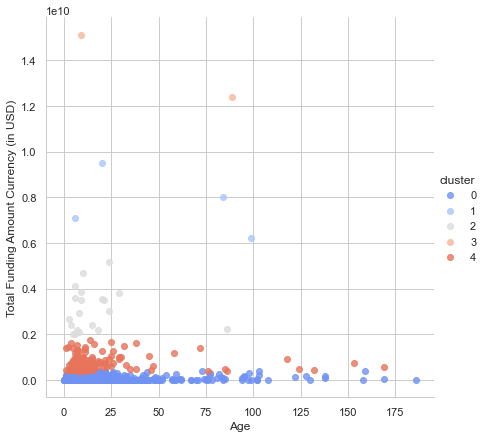

In [125]:
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Age','Total Funding Amount Currency (in USD)', data=newdata, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)